# EE 440 HW3
### Cynthia Li 1839952

In [1]:
# This is the import cell
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import color

(202, 282, 3)


Text(0.5, 1.0, 'recolored')

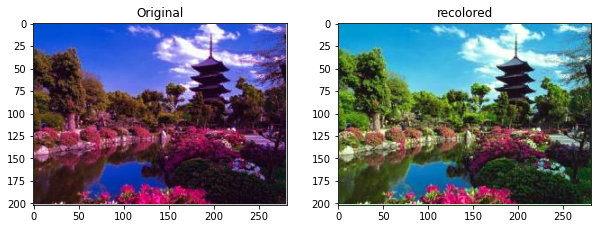

In [2]:
# Problem 1 Image Color Adjustment

# to display multiple pictures
fig1 = plt.figure(figsize=(10, 7))

# read and show the image 4_1.bmp scenery
fig1.add_subplot(1, 2, 1)
scenary = plt.imread('4_1.bmp')
plt.imshow(scenary)
plt.title("Original")

# get shape for following temperary pixel size
print(np.shape(scenary))

# convert the image to CMY
CMY = 255 * np.ones((202, 282, 3)) - scenary

# extract the magenta channel
M = CMY[:, :, 1]

# produce lower magenta and replace it in the image
weak_M = (M / 255) ** 2.5 * 255
weak_scenary = CMY
weak_scenary[:, :, 1] = weak_M
weak_scenary = (255 * np.ones((202, 282, 3)) - weak_scenary) / 255

# display the recorlored image
fig1.add_subplot(1, 2, 2)
plt.imshow(weak_scenary)
plt.title("recolored")

In [11]:
# Problem 2 Image enhancement
def plotOriginal(pic):
    # read in the picture and display the original image
    image =  plt.imread(pic)
    fig2 = plt.figure(figsize=(10, 7))
    plt.imshow(image)
    plt.title("Original")
    
    # convert image1 to hsv
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # extract v and display its histogram
    v = image[:, :, 2]
    fig3 = plt.figure(figsize=(10, 7))
    fig3.add_subplot(1, 2 , 1)
    hist = plt.hist(v.flatten(), 256, [0, 256])
    plt.title("Histogram Original")
    
    # create pdf function
    pdf = np.zeros(256)
    for i in range(256):
        # probability = value / size
        pdf[i] = hist[0][i] / (v.shape[0] * v.shape[1])
     
    # create cdf function
    cdf = np.cumsum(pdf)
    fig3.add_subplot(1, 2, 2)
    plt.plot(cdf)
    plt.title("cdf 4_2 Orignal")
    plt.show()


In [15]:
def linearStretch(pic):
    # to obtain the HSV's v channalboundary X, Y
    image = plt.imread(pic)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    v = image[:, :, 2]
    x = np.min(v)
    y = np.max(v)
    
    # perform linear stretch: (pixel_value - min) / (max - min) * 255
    hsv[:, :, 2] = ((hsv[:, :, 2] - x) / (y - x)) * 255
    v_ls = hsv[:, :, 2]

    # convert image back to RGB
    ls_new = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    fig4 = plt.figure(figsize=(10, 7))
    plt.imshow(ls_new)
    plt.title("linear stretch")

    # display the output image's histogram
    fig5 = plt.figure(figsize=(10, 7))
    fig5.add_subplot(1, 2, 1)
    hist_ls = plt.hist(v_ls.flatten(), 256, [0, 256])
    plt.title("Histogram after linear stretching")

    # create pdf function
    pdf_ls = np.zeros(256)
    for i in range(256):
        # probability = value / size
        pdf_ls[i] = hist_ls[0][i] / (v_ls.shape[0] * v_ls.shape[1])
    
    # create cdf function
    cdf_ls = np.cumsum(pdf_ls)
    fig5.add_subplot(1, 2, 2)
    plt.plot(cdf_ls)
    plt.title("cdf 4_2 linear stretch")
    plt.show()
    


In [17]:
def histEqualization(pic):
    # read in the original picture and convert it to hsv scale
    image = plt.imread(pic)
    hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    
    # generate the original histogram and cdf
    hist, bins = np.histogram(hsv[0::, 0::, 2].flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_norm = cdf * (hist.max() / cdf.max())
    
    # mapping
    cdf_eq = (cdf - cdf.min()) / (cdf.max() - cdf.min())  * 255
    
    # integer conversion
    img_eq = cdf_eq[image]
    for x in range(img_eq.shape[0]):
        for y in range(img_eq.shape[1]):
            img_eq[x, y, 2] = int(img_eq[x,y,2])
    
    # generate new histogram
    hist_eq, bins_eq = np.histogram(img_eq.flatten(), 256, [0,256])
    img_eq = img_eq.astype('uint8')
    # generate new cdf
    cdf_eq = hist_eq.cumsum()
    cdf_eq_norm = cdf_eq * (hist_eq.max() / cdf_eq.max())
    
    # display the orginal and after histogram equalization
    fig6 = plt.figure(figsize=(10, 7))
    fig6.add_subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)

    fig6.add_subplot(1, 2, 2)
    plt.title("Histogram Equalized picture")
    plt.imshow(img_eq)
    
    # display cdf and histogram
    fig7 = plt.figure(figsize=(10, 7))
    fig7.add_subplot(1, 2, 1)
    plt.plot(cdf_eq_norm)
    plt.title("histogram equalized picture - cdf")

    fig7.add_subplot(1, 2, 2)
    plt.hist(img_eq.flatten(), 256, [0,256])
    plt.title("histogram equalized picture - histogram")
    plt.show()
    
    

In [39]:
def close(List, k):
    return min(range(len(List)), key = lambda i:abs(List[i] - k))

def histSpecification(pic):
    # read in the original picture and convert it to hsv scale
    image = plt.imread(pic)
    hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    
    # generate histogram and cdf for the original image
    v = hsv[:, :, 2]
    hist, bins = np.histogram(v.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    
    # create gaussian distribution for mapping
    gauss = np.random.normal(loc = 255/2, scale = 255/6, size = hsv.shape[0]*hsv.shape[1])
    hist_gauss, bins_gauss = np.histogram(gauss.flatten(), 256, [0,256])
    cdf_gauss = hist_gauss.cumsum()
    
    # redistribute the histogram
    image2 = hsv
    for i in range(0, image2.shape[0]):
        for j in range(0, image2.shape[1]):
            # obtain the cdf value for the given pixel's gray scale value
            cdf_value = cdf[image2[i, j, 2]]
            cdf_gauss_value = close(cdf_gauss, cdf_value)
            image2[i, j, 2] = cdf_gauss_value
            
    # generate new image's histogram and cdf
    hist_spc, bins_spc = np.histogram(image2.flatten(), 256, [0, 256])
    pdf_spc = hist_spc / sum(hist_spc)
    cdf_spc = pdf_spc.cumsum()
    
    image_spc = cv2.cvtColor(image2, cv2.COLOR_HSV2BGR)
    
    # display the orginal and after histogram equalization
    fig8 = plt.figure(figsize=(10, 7))
    fig8.add_subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)
   
    fig8.add_subplot(1, 2, 2)
    plt.title("Histogram specified picture")
    plt.imshow(image_spc)
    
    # display cdf and histogram on the same plot
    fig9 = plt.figure(figsize=(10, 7))
    fig9.add_subplot(1, 2, 1)
    plt.hist(image_spc.flatten(), 256, [0,256])
    plt.title("histogram specified picture - histogram")
    fig9.add_subplot(1, 2, 2)
    plt.plot(cdf_spc)
    plt.title("histogram specified picture - cdf")
    plt.show()
    
    

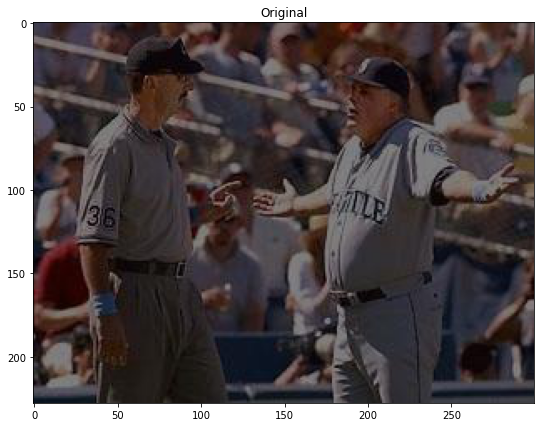

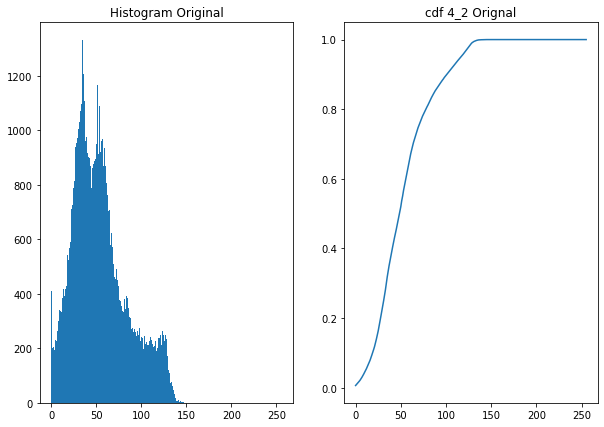

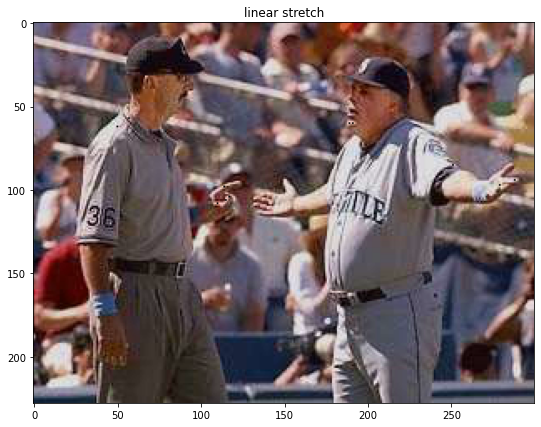

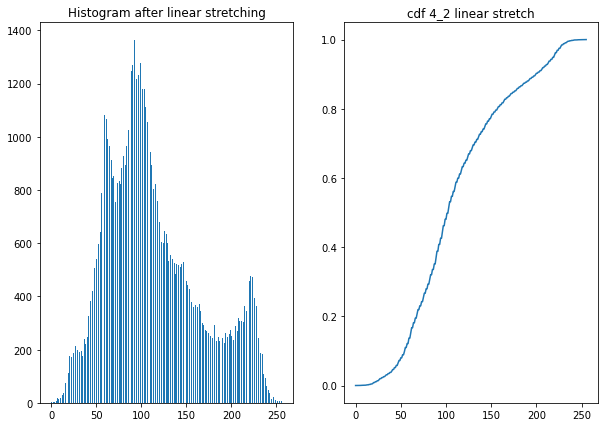

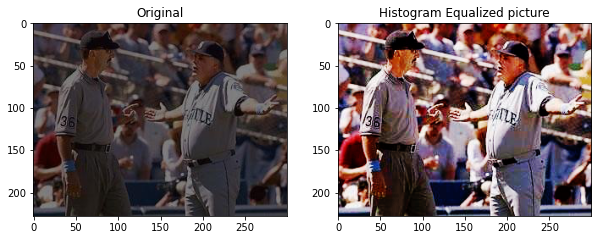

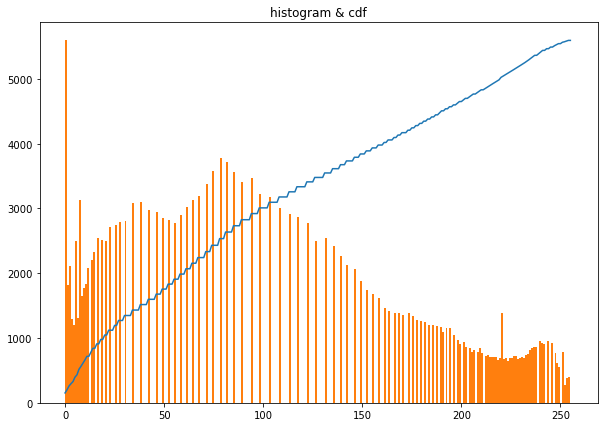

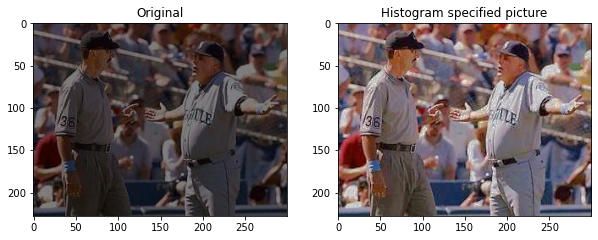

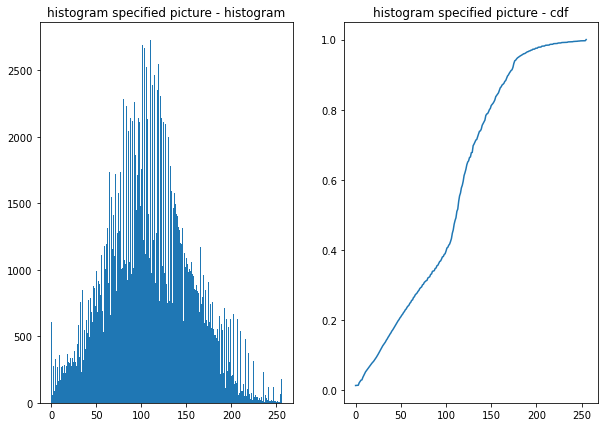

In [40]:
# i. 4_2 enhancement
img1 = '4_2.jpeg'
plotOriginal(img1)
linearStretch(img1)
histEqualization(img1)
histSpecification(img1)

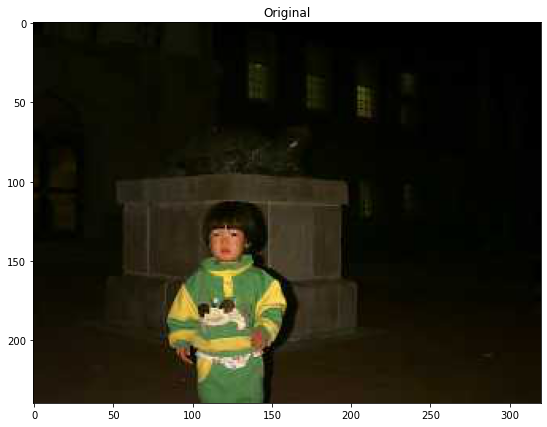

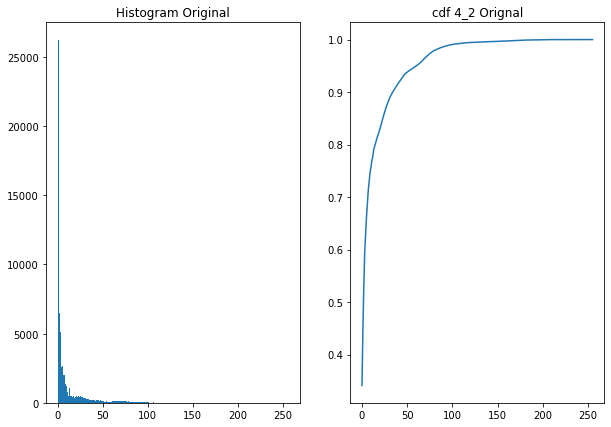

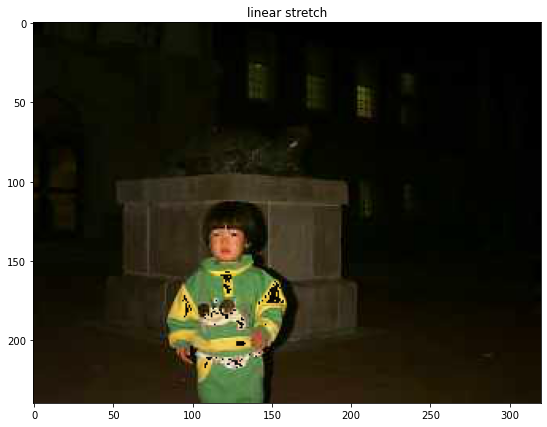

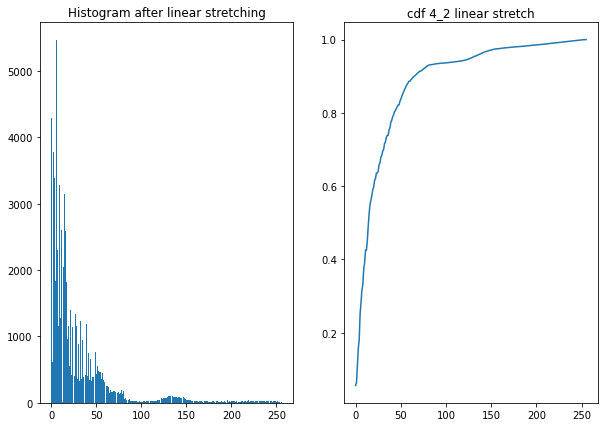

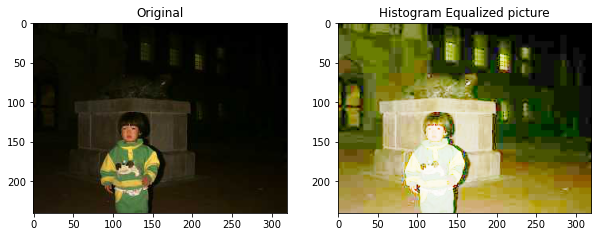

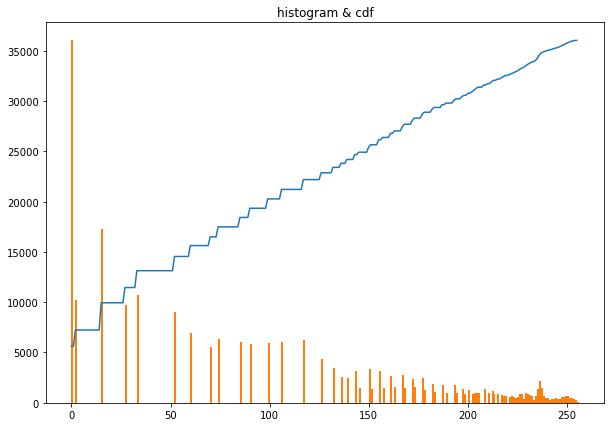

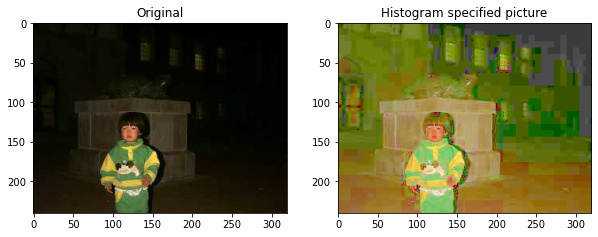

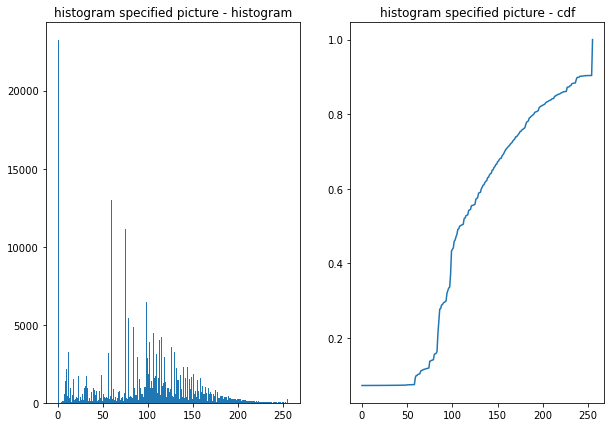

In [41]:
# i. 4_3 enhancement
img2 = '4_3.jpeg'
plotOriginal(img2)
linearStretch(img2)
histEqualization(img2)
histSpecification(img2)
